In [27]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import openpyxl

In [28]:
excel = openpyxl.Workbook()
print(excel.sheetnames)

['Sheet']


In [51]:
sheet = excel.active
print(sheet.title)
sheet.append(['title','supporters','raised','needed','posted_by','benefited_to','address','tax benifits','description','genuine'])

Sheet


In [52]:
df = pd.read_excel(r"C:\Users\ishan\Downloads\Capstone\milaap-new.xlsx")

In [53]:
df.head()

,links
0,https://milaap.org/fundraisers/support-meghana-56
1,https://milaap.org/fundraisers/support-sai-kee...
2,https://milaap.org/fundraisers/support-saisudha
3,https://milaap.org/fundraisers/support-srikris...
4,https://milaap.org/fundraisers/support-kishor-...


In [54]:
len(df['links'])

1161

In [55]:
df['links'][0]

'https://milaap.org/fundraisers/support-meghana-56'

In [56]:
source  = requests.get(df['links'][2])
print(source)

<Response [200]>


In [57]:
soup = BeautifulSoup(source.text,'html.parser')

In [58]:
page = soup.find('div',class_="campaign-page-container container")

<div class="campaign-page-container container">
<div class="campaign-page-row">
<div class="campaign-detail">
<div class="campaign-detail-section">
<div class="campaign-top-container">
<div class="banner-tag center">
        Milaap will not charge any fee on your donation to this fundraiser. 
      </div>
<div class="campaign-title">Help Venu Muddapati   recover from ICU</div>
<div class="banner-image-container">
<div class="banner-image-section">
<div class="campaign-tag">
<svg height="32.864" viewbox="0 0 98.057 32.864" width="98.057" xmlns="http://www.w3.org/2000/svg">
<g data-name="Group 3849" id="Group_3849" transform="translate(-183.445 -165.698)">
<g data-name="Group 3851" id="Group_3851" transform="translate(183.445 165.698)">
<rect data-name="Rectangle 2295" fill="#9c3353" height="6.89" id="Rectangle_2295" transform="translate(0 2.76)" width="3.916"></rect>
<path d="M3095.313,958.307h0a2.759,2.759,0,0,1,2.759-2.76h1.157v5.519h-1.157A2.759,2.759,0,0,1,3095.313,958.307Z" data-na
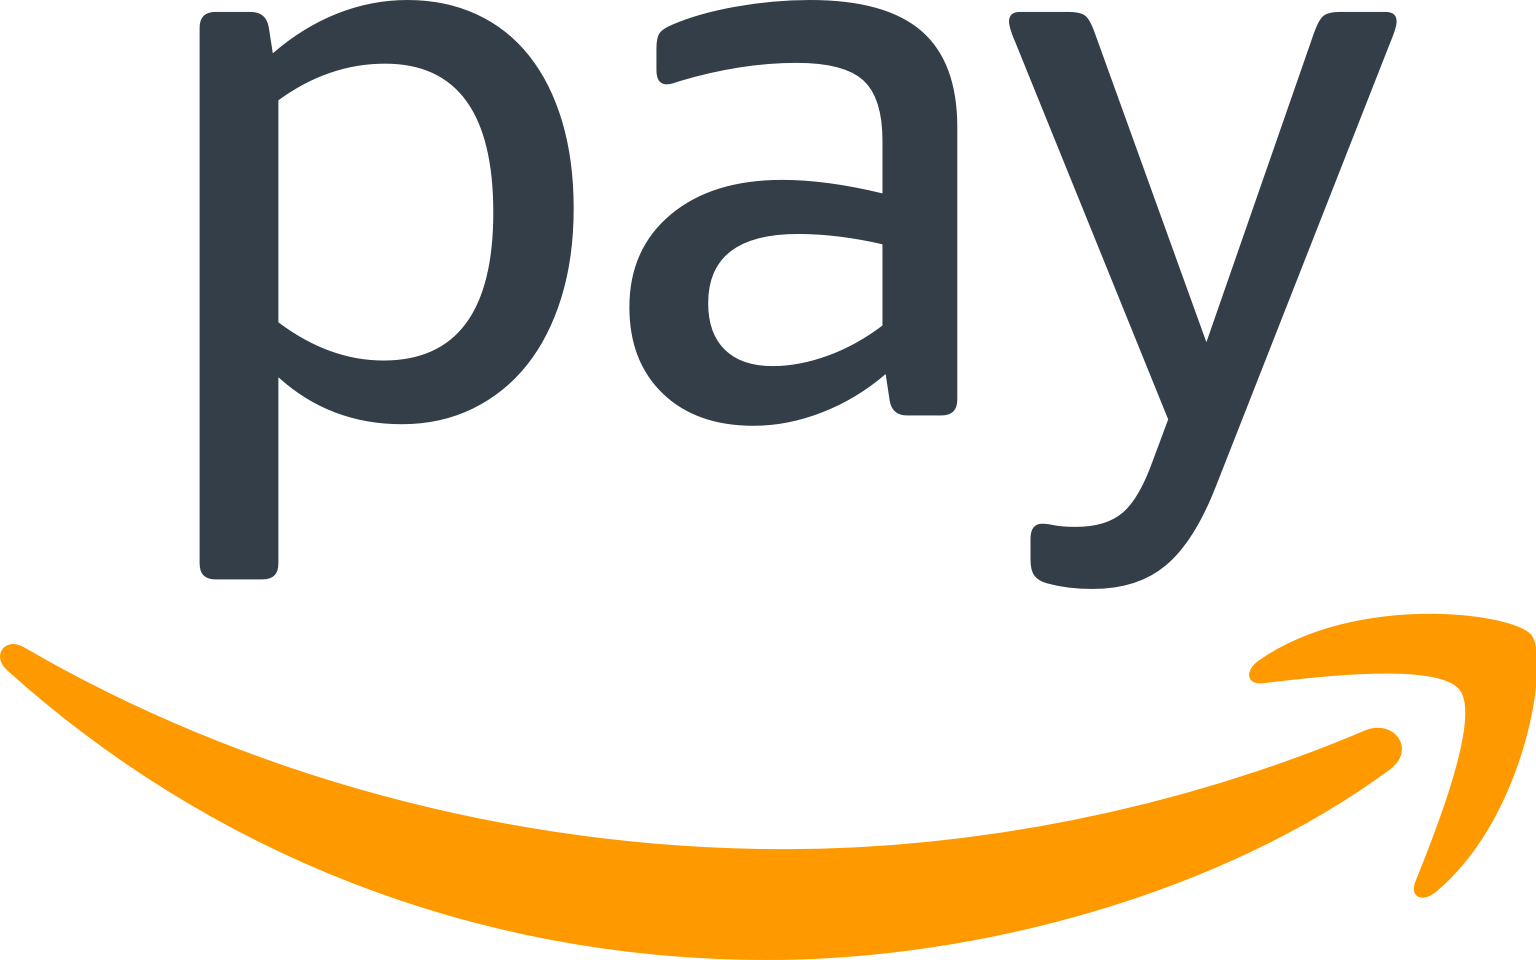

In [59]:
page

In [60]:
title = page.find('div',class_="campaign-title").text
print(title)

Help Venu Muddapati   recover from ICU


In [61]:
supporters = page.find('div',class_="supporters-count").span.text
print(supporters.split(" ")[0])

269


In [62]:
raised_amount = page.find('div',class_="raised-amount")
raised = raised_amount.find('div',class_="amount").text
print(raised.split(" ")[10])
needed = raised_amount.find('div',class_="target").text
print(needed.split(" ")[2])

Rs.6,62,898

Rs.25,00,000



In [63]:
posted = page.find('div',class_="campaign-owner-detail").ul.li
posted_by = posted.find('span',class_="title").text
print(posted_by)

SaiSudha Muddapati


In [64]:
benefit = page.find('ul',class_="collection beneficiary-detail").li
benefit_to = benefit.find('span',class_="title").text
print(benefit_to)

Venu Muddapati


In [65]:
address = page.find('ul',class_="collection beneficiary-detail").li
address_to =address.find('p',class_="user-detail").text
print(address_to)


      from Nellore, Andhra Pradesh
    


In [66]:
tax = page.div.div.find("div",class_="col s12").p.text
tax

'80G tax benefits for INR donations'

In [67]:
page.div.find("div",class_="story-content fr-view").text

'\n\xa0My name is SaiSudha Muddapati and I am here to raise funds for my Husband Venu Muddapati\xa0who is 45 years old. Venu lives in Nellore, Andhra Pradesh with his spouse & 2 young boys (10 and 7 years).Venu is suffering from Lung damage post COVID-19 issues, his health has been deteriorating from \xa0the last few months due to multiple reasons . He lost his job from Amazon in Feb 2022 and things got worsen when he lost his father ten days back.Our family had spent more than 2,00,000 till now on his treatment which is arranged from savings, support from Friends and hand loans.He is currently admitted and receiving ICU treatment in Kauvery Hospital Alwarpet Chennai, Tamil Nadu. Due to his age, there is high chance of recovery and in the next few days, we need Rs.25,00,000.00 to Rs.30,00,000.00 approx more for further treatment.Considering the poor financial plight of my family as I don’t work. Please come forward to support my cause.Any contribution will be of immense help. Do contri

In [68]:
link = page.div.div.find("div",class_="image-section").img

In [69]:
link.get_attribute_list('src')[0]

'https://cimages.milaap.org/milaap/image/upload/c_fill,h_452,w_603/v1666202183/production/images/campaign/581313/medical_1553587798_1666202181.jpg'

In [70]:
genuine = page.find("div",class_="verify-msg").text

AttributeError: 'NoneType' object has no attribute 'text'

In [ ]:
count = 0

In [71]:
for i in df['links'][:1058]:
    source  = requests.get(i)
    #print(source)
    soup = BeautifulSoup(source.text,'html.parser')
    page = soup.find('div',class_="campaign-page-container container")
    
    try:
        title = page.find('div',class_="campaign-title").text
    except:
        title = 'unknown'
    try:
        supporters = page.find('div',class_="supporters-count").span.text.split(" ")[0]
    except:
        supporters = ''
    
    try:
        raised_amount = page.find('div',class_="raised-amount")
        raised = raised_amount.find('div',class_="amount").text.split(" ")[10]
    except:
        raised = ''    
    
    try:
        needed = raised_amount.find('div',class_="target").text.split(" ")[2]
    except:
        needed = ''
    
    try:
        posted = page.find('div',class_="campaign-owner-detail").ul.li
        posted_by = posted.find('span',class_="title").text
    except:
        posted_by=''
    try:
        benefit = page.find('ul',class_="collection beneficiary-detail").li
        benefit_to = benefit.find('span',class_="title").text
    except:
        benefit_to = ''
    
    try:
        address = page.find('ul',class_="collection beneficiary-detail").li
        address_to =address.find('p',class_="user-detail").text
    except:
        address_to=''
    try:
        tax = page.div.div.find("div",class_="col s12").p.text
    except AttributeError:
        tax = ''
    
    try:
        description = page.div.find("div",class_="story-content fr-view").text
    except:
        description = ''
    
    
    try:
        genuine = page.find("div",class_="verify-msg").text
    except AttributeError:
        genuine = 'not verified'
    
    print(count)
    count = count+1
    
    sheet.append([title,supporters,raised,needed,posted_by,benefit_to,address_to,tax,description,genuine])

86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
33

In [72]:
excel.save("milaap-scarped.xlsx")

In [ ]:
df['links'][0]